# Dimensionality Reduction Techniques on Image Data ( Fashion MNIST Data )

Section 1: Importing Data Dynamically

In [1]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
!pip install umap-learn

--2021-11-16 08:33:52--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.56
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.169.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4422102 (4.2M) [binary/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   4.22M  3.81MB/s    in 1.1s    

2021-11-16 08:33:53 (3.81 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [4422102/4422102]

--2021-11-16 08:33:54--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.56
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.

In [3]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from collections import OrderedDict
from functools import partial
from time import time
from matplotlib.ticker import NullFormatter

In [4]:
#To suppress unnecesary future warings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [5]:
def load_mnist():

    """Load MNIST data from `path`"""
    labels_path = os.path.join('t10k-labels-idx1-ubyte.gz')
    images_path = os.path.join('t10k-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,     
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
data,labels = load_mnist()
data.shape

(10000, 784)

Digits dataset is a image dataset of handwritten digit having 1797 8×8 images

Import libraries and load dataset

Taking a sample image to view

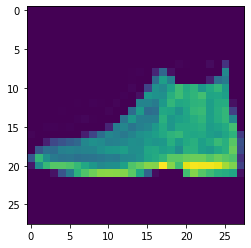

In [7]:
#image is in the form of numpy array.
image_sample = data[0, :].reshape(28, 28)
plt.imshow(image_sample)

# **1) PCA - Principal Component Analysis**

Reduce Image Dimensions

The data gets reduced from (10000, 64) to (10000, 2)

In [8]:
pca_2 = PCA(2) # we need 2 principal components.
converted_data = pca_2.fit_transform(data)
converted_data.shape

(10000, 2)

Visualize the Resulting Dataset

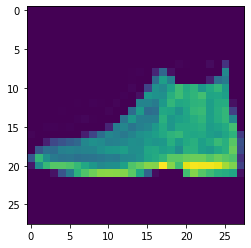

In [9]:
plt.imshow(data[0,:].reshape(28,28))

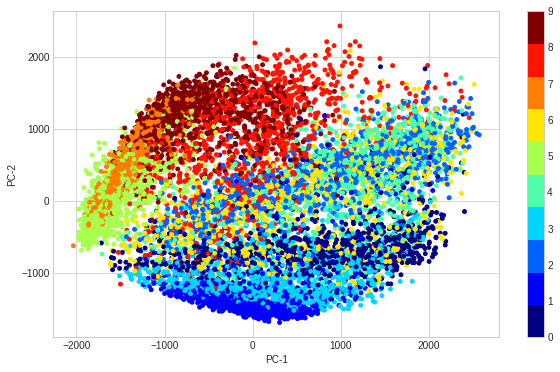

In [10]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [11]:
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_2.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  46.80761251887262


In [12]:
pca_64 = PCA(64) 
converted_data = pca_64.fit_transform(data)
converted_data.shape

(10000, 64)

In [13]:
print('Variance explained by the First PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(pca_64.explained_variance_ratio_ * 100)[63])

Variance explained by the First PCs =  29.166946061170364
Variance explained by the First 2 PCs =  46.807612518872574
Variance explained by the First 5 PCs =  61.60610854421826
Variance explained by the First 10 PCs =  88.17039278487721


# **2) SVD - Single Value Decomposition**

In [14]:
trun_svd =  TruncatedSVD(n_components = 63)
A_transformed = trun_svd.fit_transform(data)

In [15]:
print("Transformed Matrix:")
print(A_transformed[:2])

Transformed Matrix:
[[ 1.41339829e+03  1.27895335e+03 -5.20559563e+02  1.42885255e+02
   3.52850948e+01 -1.05829059e+02 -2.74232493e+02  1.74589160e+02
  -3.63679742e+02 -3.70291987e+02 -1.14435794e+02  1.30452221e+02
  -1.14953343e+02 -1.11288138e+01 -6.20923423e+01  5.58786162e+01
  -4.31936913e+01  1.48206268e+02  2.22865165e+00  7.60583943e+01
  -2.32517700e+02 -1.59384939e+02 -2.13916032e+02  8.60692253e+01
  -4.51504248e+01  1.07533107e+02 -1.53951670e+02  1.24275419e+02
   6.52655374e-01 -5.51239176e+01  6.66271258e+01  8.00645411e+00
   6.57657458e+01 -2.43469617e+01  1.29629388e+02  1.04962888e+02
  -2.40642586e+02  2.37259525e+02 -1.42792833e+02 -5.41789961e+01
  -6.88911062e+01  1.75577930e+02 -1.71312327e+01  8.94089717e+01
  -4.14127372e+00  5.74688533e+01 -7.39727273e+00 -1.10623882e+01
  -4.59873855e+01 -2.26788637e+01  6.15616705e+00 -5.72188935e+00
  -9.13827205e+01 -1.67386362e+02 -2.52724990e+01 -5.83993904e+01
  -1.15837067e+01  1.11941595e+02 -2.76480650e+01  3.095

In [16]:
print('Variance explained by the First PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[62])

Variance explained by the First PCs =  24.918116260239113
Variance explained by the First 2 PCs =  44.20452334173142
Variance explained by the First 5 PCs =  61.33095045294271
Variance explained by the First 10 PCs =  88.03898410758039


In [17]:
trun_svd =  TruncatedSVD(n_components = 2)
A_transformed = trun_svd.fit_transform(data)

In [18]:
print("Transformed Matrix:")
print(A_transformed[:10])

Transformed Matrix:
[[ 1.41339829e+03  1.27895335e+03]
 [ 4.28410938e+03  2.42734934e+02]
 [ 2.50551998e+03 -1.38405084e+03]
 [ 1.71234996e+03 -1.14650291e+03]
 [ 2.60684999e+03  1.68074055e+01]
 [ 2.33644556e+03 -1.17466763e+03]
 [ 1.20191459e+03 -1.90103384e+02]
 [ 2.02399534e+03  2.99213538e-01]
 [ 4.53507639e+02  2.23199053e+02]
 [ 1.04636107e+03  7.87225259e+02]]


In [19]:
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  44.20452334162975


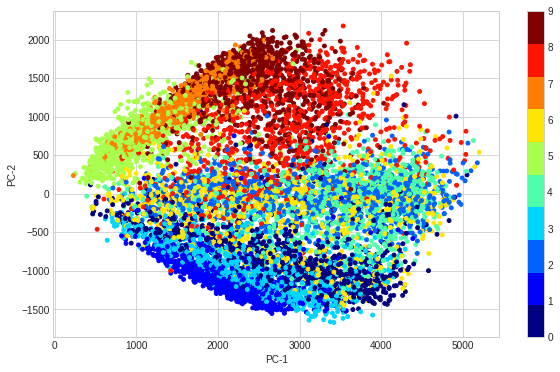

In [20]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(A_transformed[:, 0], A_transformed[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

# **3) LLE - Locally Linear Embedding**

In [21]:
embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(data)
X_transformed.shape

(10000, 2)

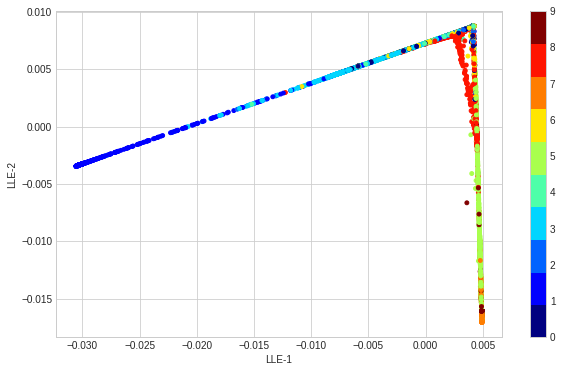

In [22]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

# **4) tSNE - t Distributed Stochastic Neighbor Embedding**

In [23]:
X_embedded = TSNE().fit_transform(data)
X_embedded.shape

(10000, 2)

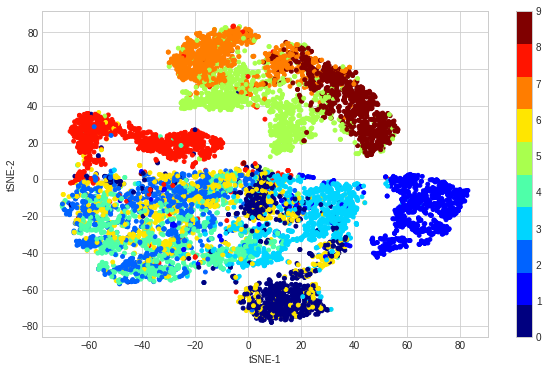

In [24]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

# **5) ISOMAP - Isometric Mapping**

In [25]:
embedding = Isomap(n_components = 2)
X_transformed = embedding.fit_transform(data)
X_transformed.shape

(10000, 2)

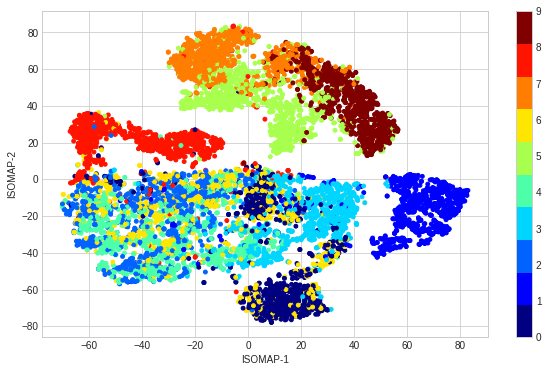

In [26]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

# **6) UMAP**

In [27]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'Embedding by UMAP')

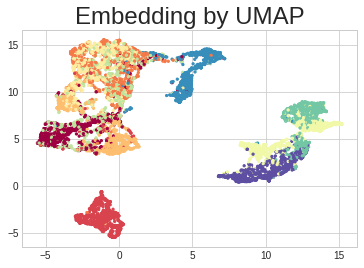

In [28]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = labels, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24)

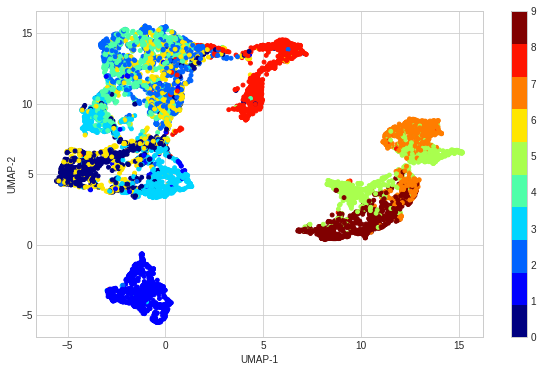

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = labels)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

# **Plotting all Methods** (For side by side comparison)

In [ ]:
n_neighbors = 10
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

method_keys = ["LLE","t-SNE","UMAP","ISOMAP","SVD","PCA"]
methods = {}
methods['LLE'] = LocallyLinearEmbedding(n_neighbors=n_neighbors)
methods['t-SNE'] = TSNE(init='pca')
methods['UMAP'] = umap.UMAP()
methods['ISOMAP'] = Isomap()
methods['SVD'] = TruncatedSVD()
methods['PCA']=PCA()
# Plotting the results
for i,method in enumerate(method_keys):
    t0 = time()
    Y = methods[method].fit_transform(data)
    t1 = time()
    time_elapsed = t1-t0
    print("%s: %.2g sec" % (method, time_elapsed))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (method, time_elapsed))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

LLE: 13 sec
t-SNE: 95 sec
UMAP: 27 sec
